## Загрузка необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from tqdm import tqdm


import warnings
warnings.filterwarnings("ignore")

In [2]:
def create_sequences(data, seq_lenght):
    X, y = [], []
    for i in range(len(data) - seq_lenght):
        X.append(data[i:(i+seq_lenght)])
        y.append(data[i+seq_lenght])
    return np.array(X), np.array(y)

## Данные

Загрузка датасета временного ряда

In [3]:
df = pd.read_csv('../../../data/SKAB/anomaly-free/anomaly-free.csv', sep=';', index_col='datetime', parse_dates=True)

Визуализация временного ряда

<Axes: xlabel='datetime'>

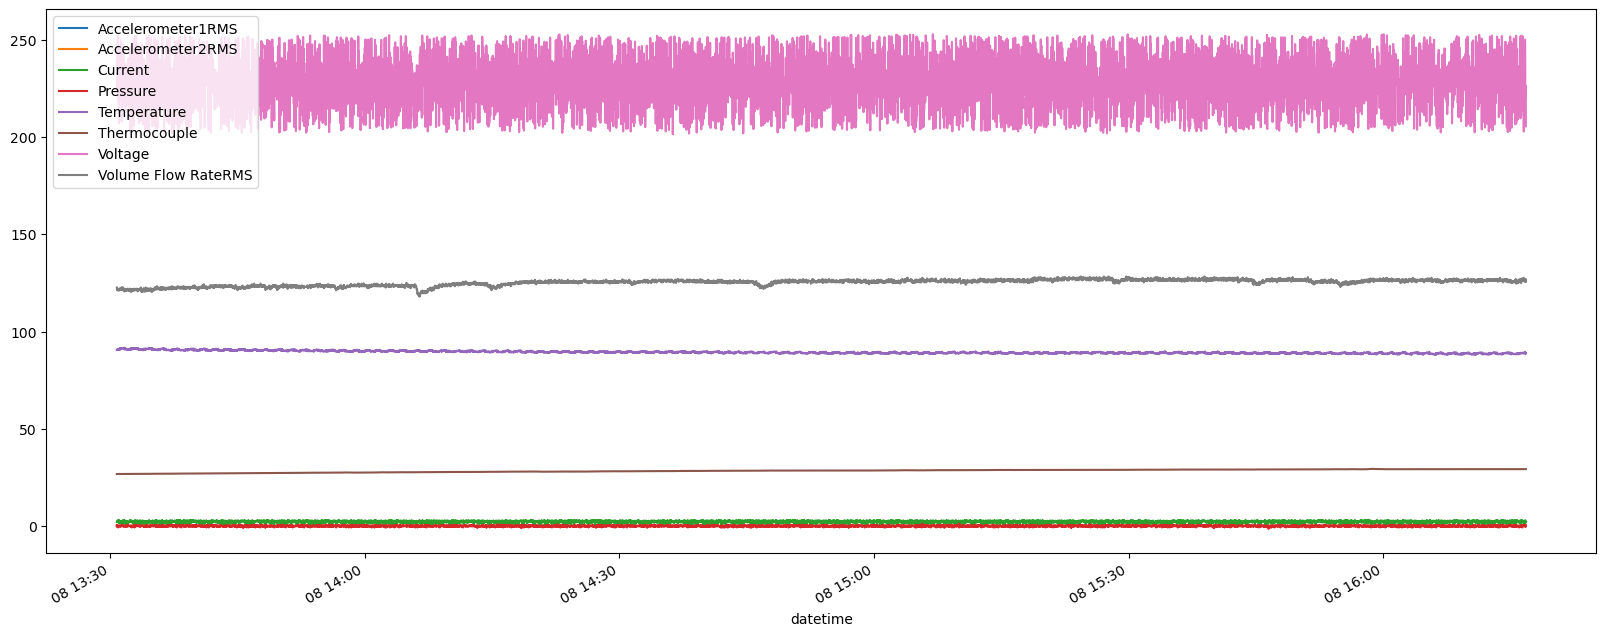

In [4]:
df.plot(figsize=(20,8))

In [5]:
df.head()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
datetime,,,,,,,,
2020-02-08 13:30:47,0.202394,0.275154,2.16975,0.382638,90.6454,26.8508,238.852,122.664
2020-02-08 13:30:48,0.203153,0.277857,2.07999,-0.273216,90.7978,26.8639,227.943,122.338
2020-02-08 13:30:50,0.202054,0.275790,2.52577,0.382638,90.7730,26.8603,223.486,121.338
2020-02-08 13:30:51,0.203595,0.278101,2.49742,0.054711,90.8424,26.8616,244.904,121.664
2020-02-08 13:30:52,0.201889,0.276363,2.29194,0.710565,90.6664,26.8603,239.196,122.000


## Анализ и прогнозирование временного ряда

### Accelerometer1RMS

In [6]:
column = "Accelerometer1RMS"

1. ADF :  -3.6148769415417594
2. P-Value :  0.005482899762788733
3. Num Of Lags :  32



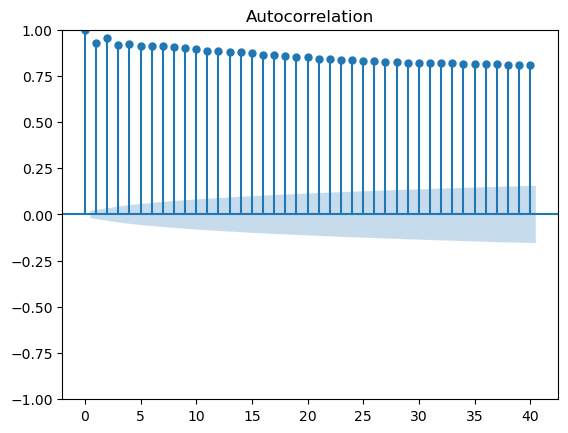

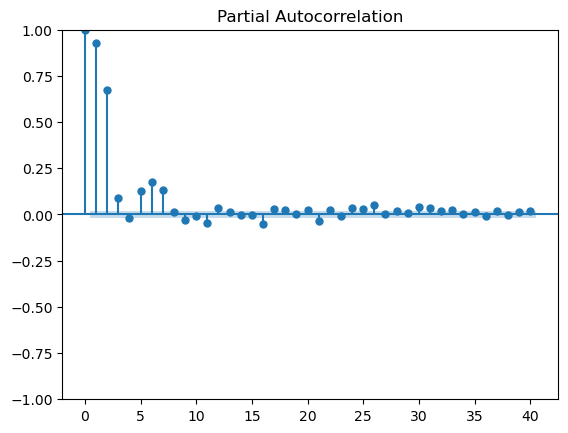

In [7]:
# Тест и АКФ (ЧАКФ) для исходного ряда
ts = np.diff(df[column], n=0)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

1. ADF :  -21.094195351001105
2. P-Value :  0.0
3. Num Of Lags :  38



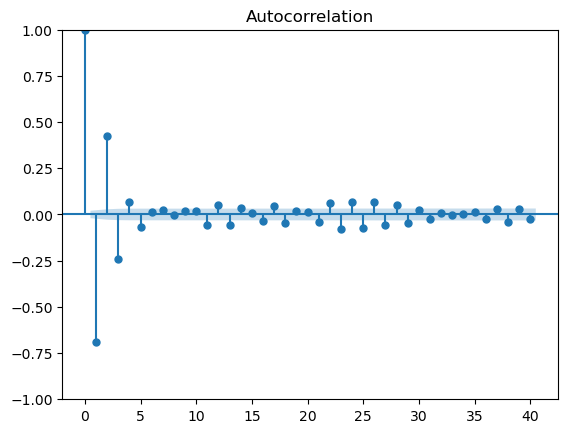

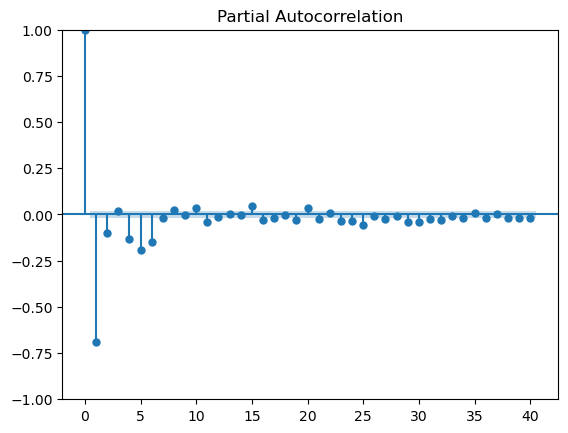

In [8]:
# Тест и АКФ (ЧАКФ) для дифференцированного временного ряда
ts = np.diff(df[column], n=1)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

In [9]:
seq_lenght = dftest[2]
data = np.array(df[column])
X, y_true = create_sequences(data, seq_lenght)

100%|██████████| 300/300 [00:23<00:00, 12.68it/s]


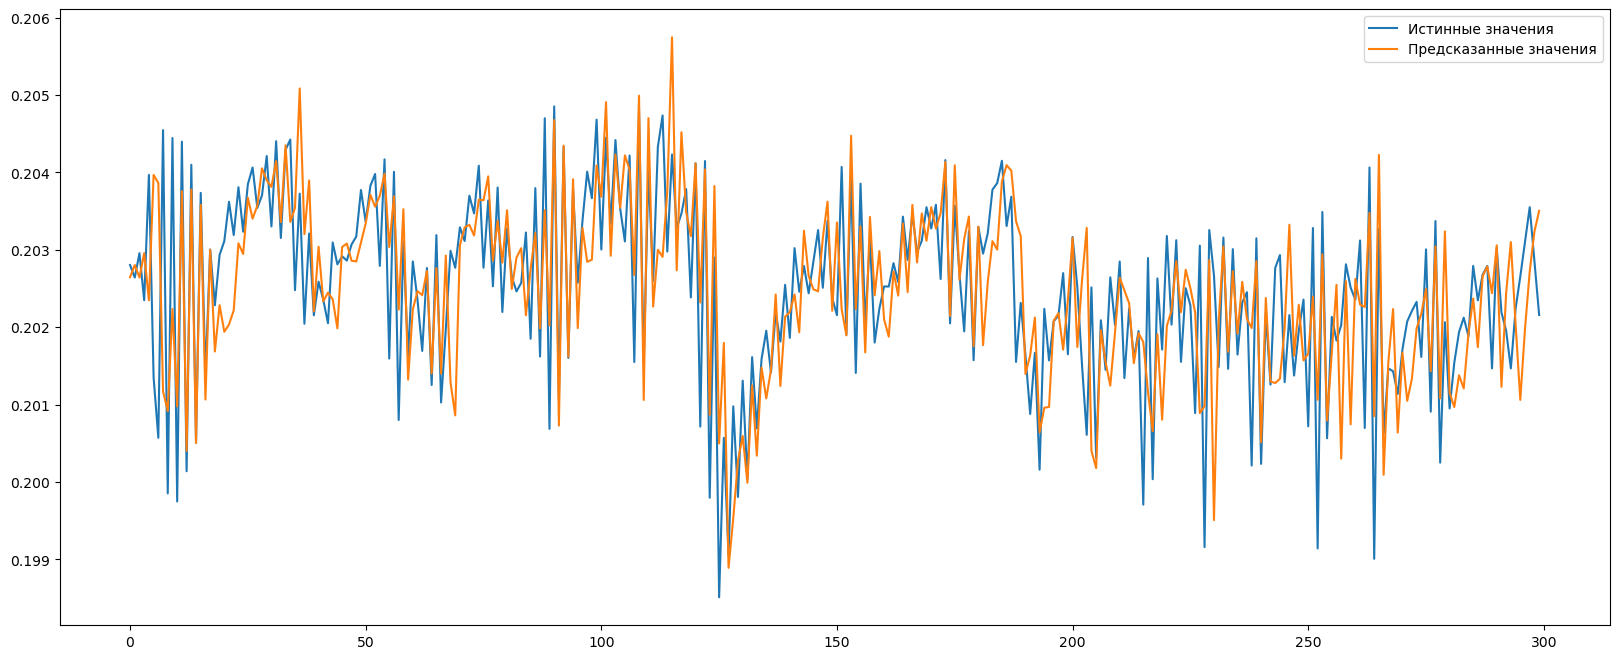

MSE Accelerometer1RMS 7.821401080289558e-07


In [10]:
p = 2
d = 1
q = 2

y_pred = []
for i in tqdm(range(len(X[:300]))):
    model = ARIMA(X[i], order=(p, d, q))
    model_fit = model.fit()
    pred = model_fit.predict(seq_lenght,seq_lenght, dynamic=False)
    y_pred.append(pred)
y_pred = np.array(y_pred)

fig = plt.figure(figsize=(20, 8))
plt.plot(y_true[:300], label = "Истинные значения")
plt.plot(y_pred[:300], label = "Предсказанные значения")
plt.legend()
plt.show()

print("MSE", column, mean_squared_error(y_true[:300], y_pred[:300]))

### Accelerometer2RMS

In [103]:
column = "Accelerometer2RMS"

1. ADF :  -2.8397000456255697
2. P-Value :  0.05282284534860737
3. Num Of Lags :  37



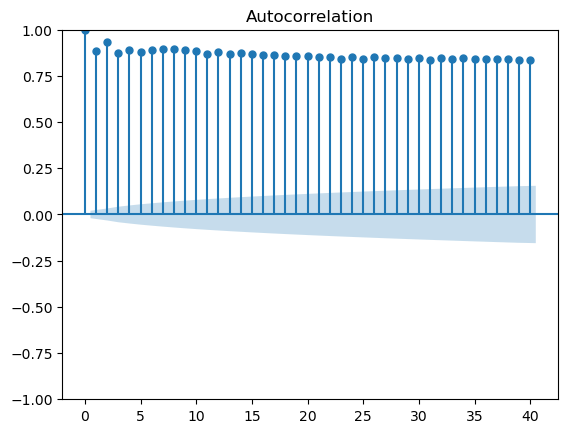

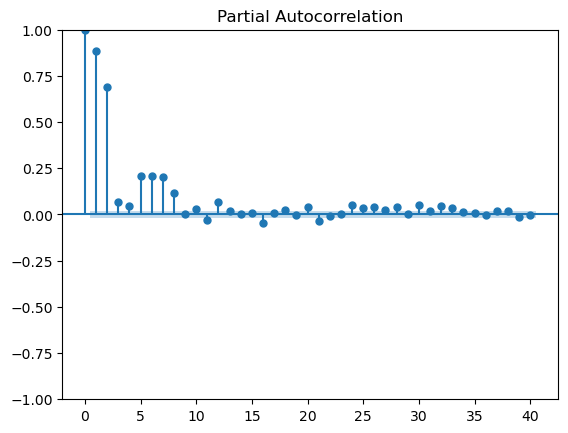

In [104]:
# Тест и АКФ (ЧАКФ) для исходного ряда
ts = np.diff(df[column], n=0)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

1. ADF :  -23.603012312368246
2. P-Value :  0.0
3. Num Of Lags :  36



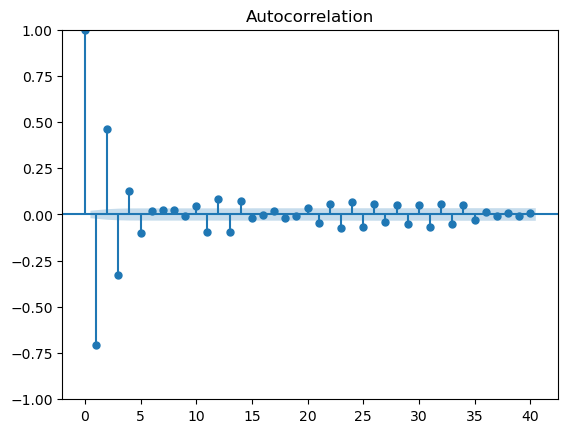

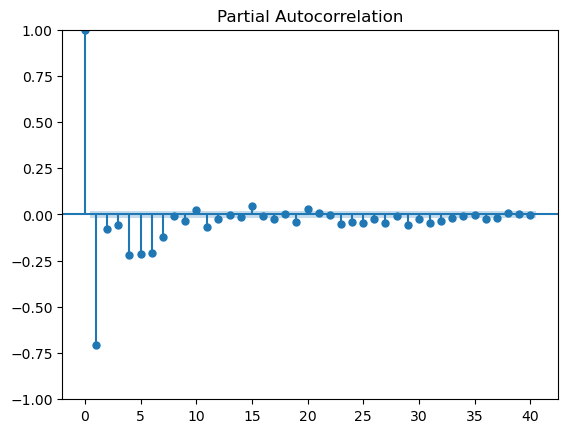

In [108]:
# Тест и АКФ (ЧАКФ) для дифференцированного временного ряда
ts = np.diff(df[column], n=1)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

In [109]:
seq_lenght = dftest[2]
data = np.array(df[column])
X, y_true = create_sequences(data, seq_lenght)

100%|██████████| 300/300 [00:24<00:00, 12.15it/s]


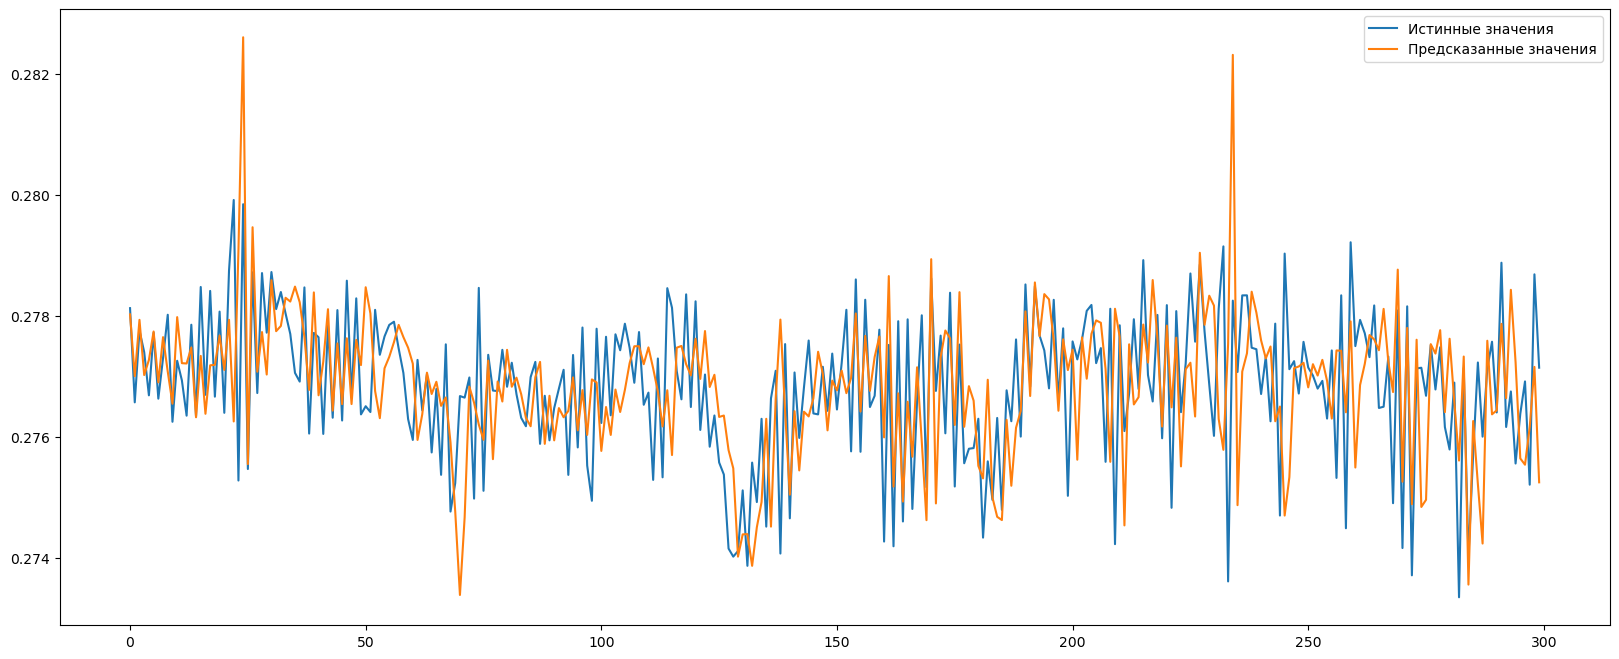

MSE Accelerometer2RMS 1.4630216362324226e-06


In [110]:
p = 2
d = 1
q = 2

y_pred = []
for i in tqdm(range(len(X[:300]))):
    model = ARIMA(X[i], order=(p, d, q))
    model_fit = model.fit()
    pred = model_fit.predict(seq_lenght,seq_lenght, dynamic=False)
    y_pred.append(pred)
y_pred = np.array(y_pred)
fig = plt.figure(figsize=(20, 8))
plt.plot(y_true[:300], label = "Истинные значения")
plt.plot(y_pred[:300], label = "Предсказанные значения")
plt.legend()
plt.show()

print("MSE", column, mean_squared_error(y_true[:300], y_pred[:300]))

### Current

In [111]:
column = "Current"

1. ADF :  -20.595541347265833
2. P-Value :  0.0
3. Num Of Lags :  26



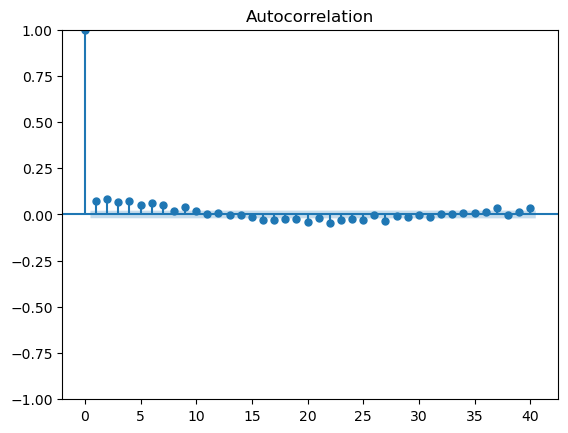

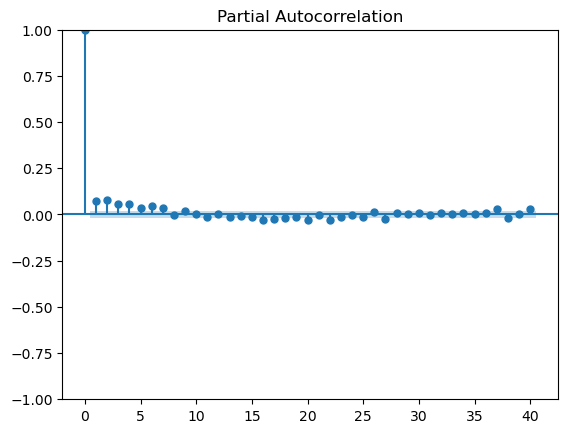

In [112]:
# Тест и АКФ (ЧАКФ) для исходного ряда
ts = np.diff(df[column], n=0)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

1. ADF :  -28.512055139104124
2. P-Value :  0.0
3. Num Of Lags :  38



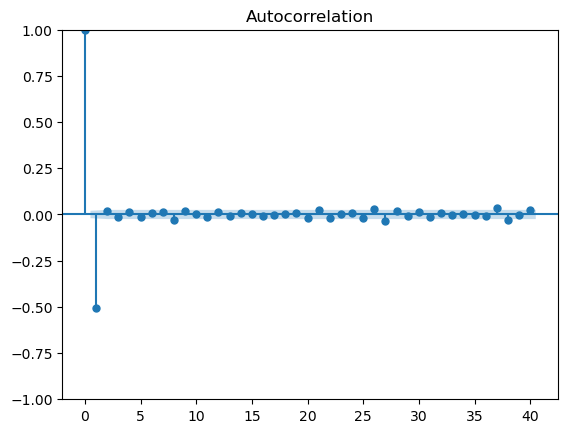

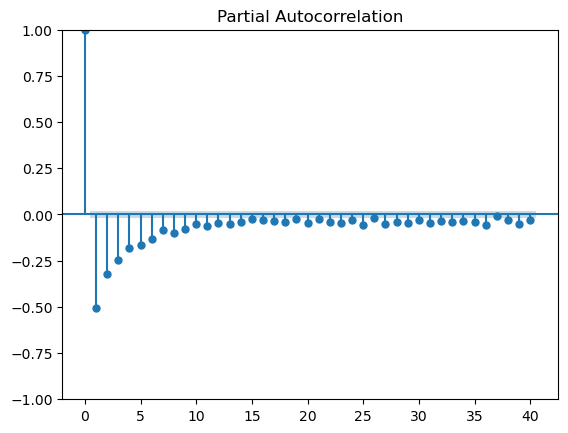

In [113]:
# Тест и АКФ (ЧАКФ) для дифференцированного временного ряда
ts = np.diff(df[column], n=1)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

In [114]:
seq_lenght = dftest[2]
data = np.array(df[column])
X, y_true = create_sequences(data, seq_lenght)

100%|██████████| 300/300 [00:21<00:00, 13.70it/s]


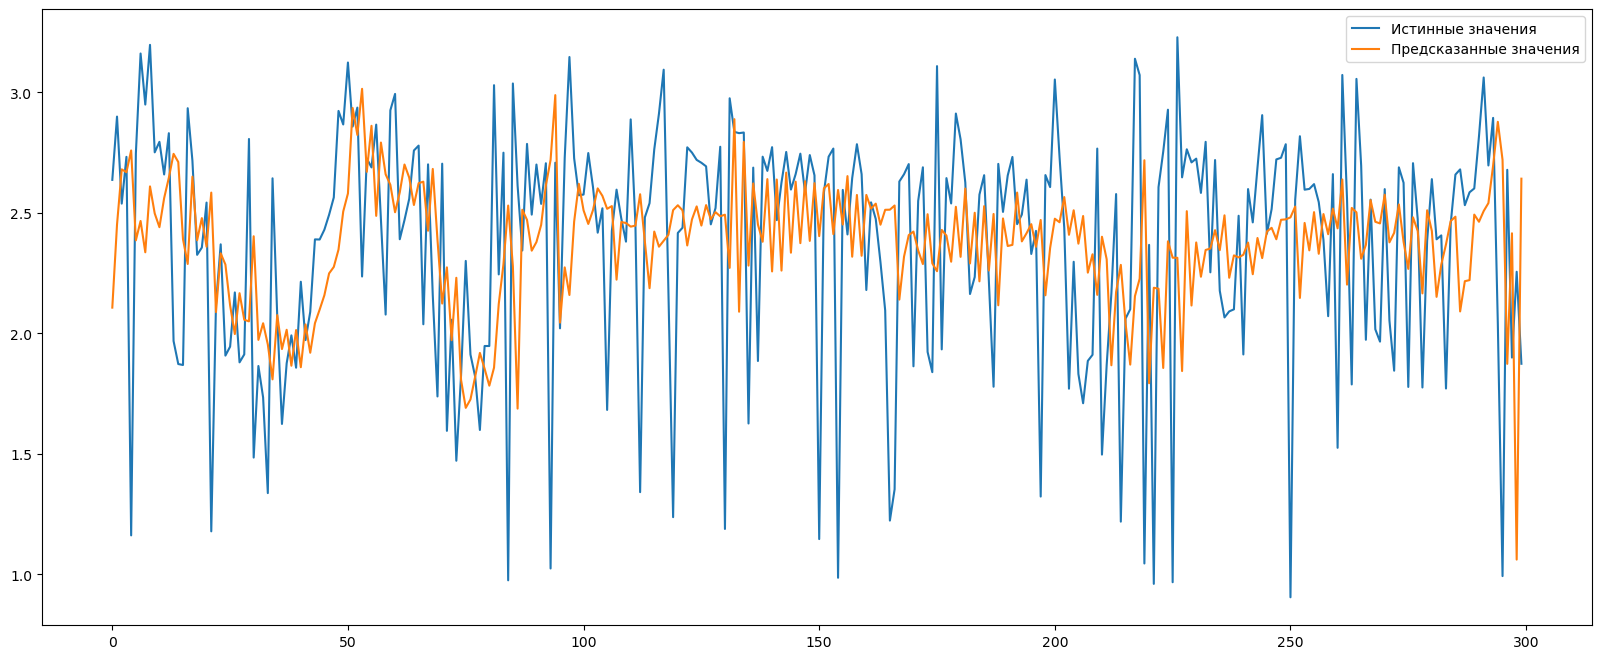

MSE Current 0.28451425920440426


In [117]:
p = 2
d = 1
q = 2

y_pred = []
for i in tqdm(range(len(X[:300]))):
    model = ARIMA(X[i], order=(p, d, q))
    model_fit = model.fit()
    pred = model_fit.predict(seq_lenght,seq_lenght, dynamic=False)
    y_pred.append(pred)
y_pred = np.array(y_pred)
fig = plt.figure(figsize=(20, 8))
plt.plot(y_true[:300], label = "Истинные значения")
plt.plot(y_pred[:300], label = "Предсказанные значения")
plt.legend()
plt.show()

print("MSE", column, mean_squared_error(y_true[:300], y_pred[:300]))

### Pressure

In [118]:
column = "Pressure"

1. ADF :  -87.11789866136489
2. P-Value :  0.0
3. Num Of Lags :  0



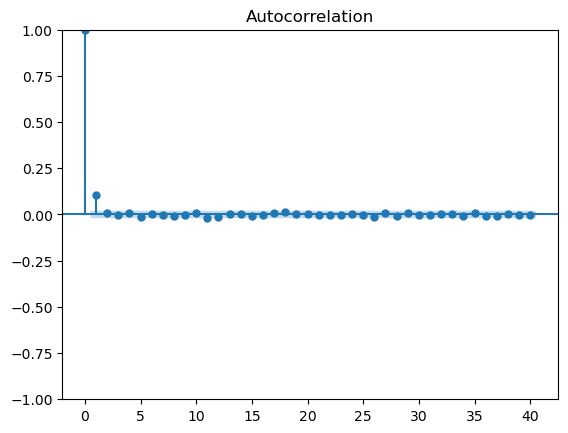

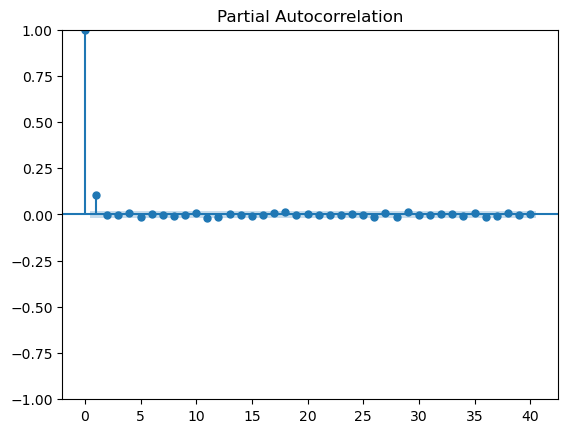

In [119]:
# Тест и АКФ (ЧАКФ) для исходного ряда
ts = np.diff(df[column], n=0)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

1. ADF :  -26.820203172949487
2. P-Value :  0.0
3. Num Of Lags :  38



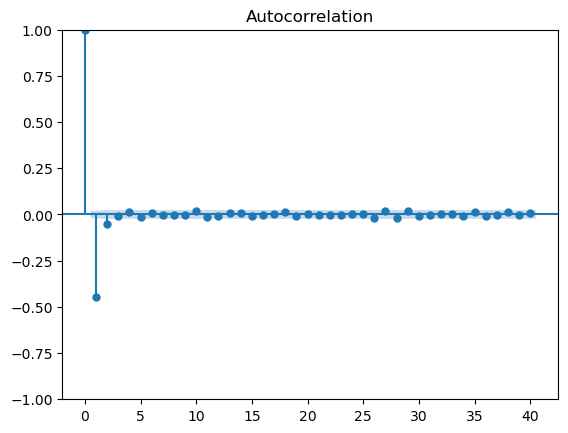

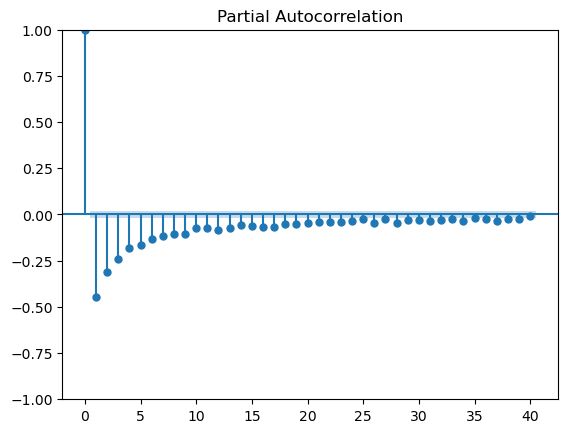

In [120]:
# Тест и АКФ (ЧАКФ) для дифференцированного временного ряда
ts = np.diff(df[column], n=1)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

In [ ]:
seq_lenght = dftest[2]
data = np.array(df[column])
X, y_true = create_sequences(data, seq_lenght)

100%|██████████| 300/300 [00:28<00:00, 10.68it/s]


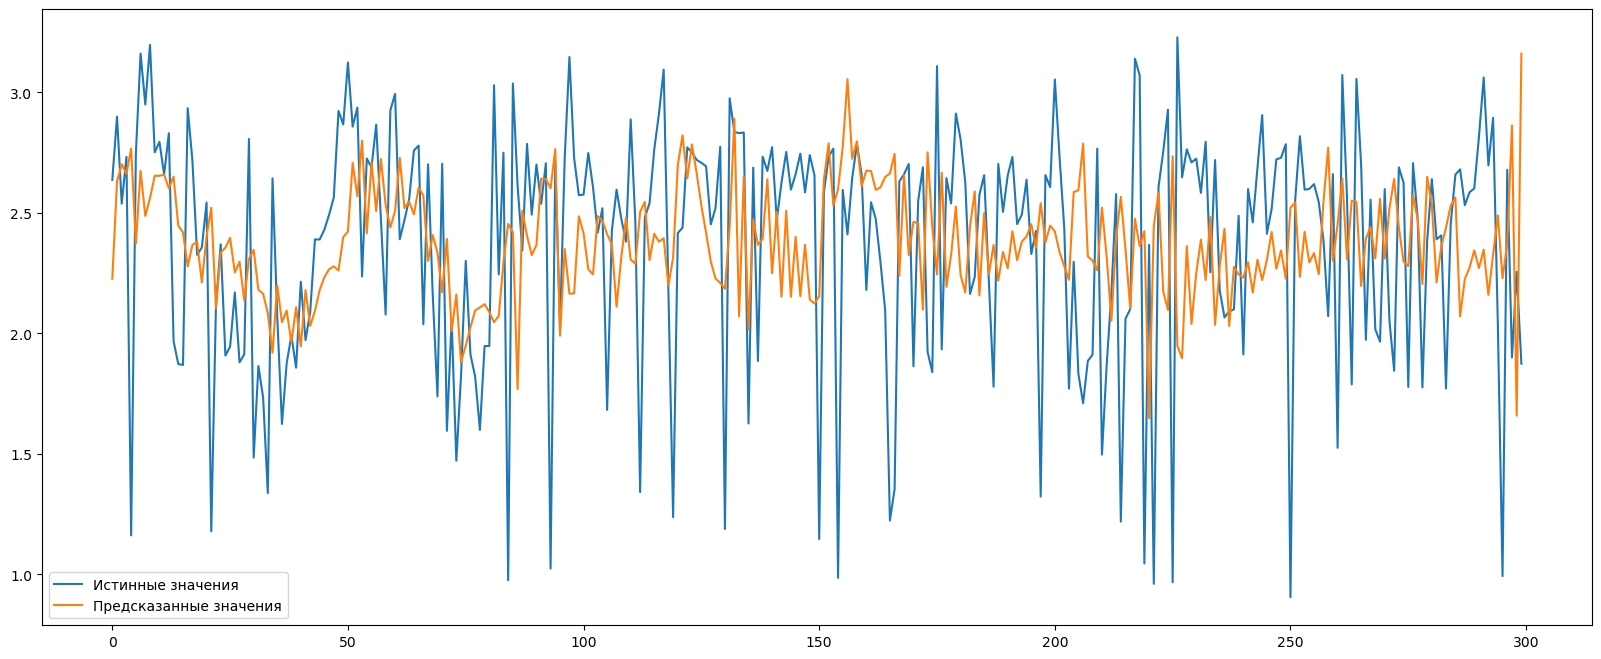

MSE Pressure 0.29715177399822473


In [121]:
p = 2
d = 0
q = 2

y_pred = []
for i in tqdm(range(len(X[:300]))):
    model = ARIMA(X[i], order=(p, d, q))
    model_fit = model.fit()
    pred = model_fit.predict(seq_lenght,seq_lenght, dynamic=False)
    y_pred.append(pred)
y_pred = np.array(y_pred)
fig = plt.figure(figsize=(20, 8))
plt.plot(y_true[:300], label = "Истинные значения")
plt.plot(y_pred[:300], label = "Предсказанные значения")
plt.legend()
plt.show()

print("MSE", column, mean_squared_error(y_true[:300], y_pred[:300]))

### Temperature

In [122]:
column = "Temperature"

1. ADF :  -4.737769371176162
2. P-Value :  7.142821405574464e-05
3. Num Of Lags :  38



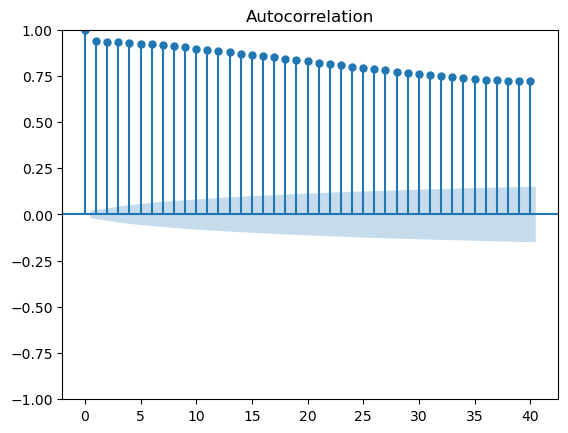

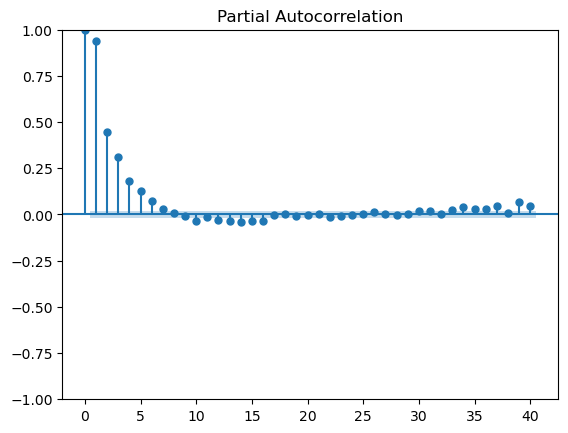

In [123]:
# Тест и АКФ (ЧАКФ) для исходного ряда
ts = np.diff(df[column], n=0)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

1. ADF :  -22.115447226620624
2. P-Value :  0.0
3. Num Of Lags :  38



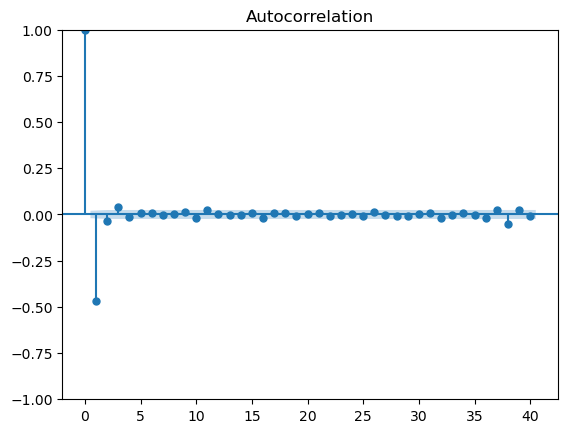

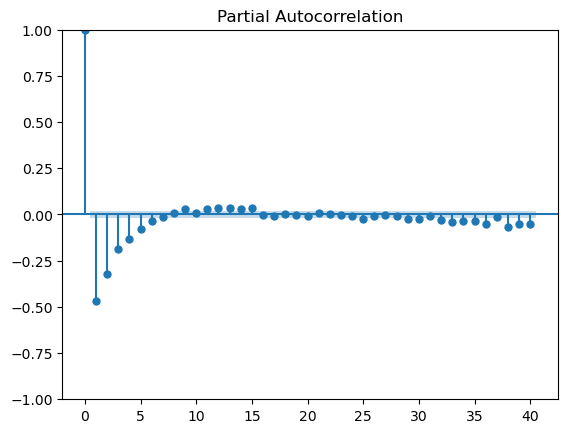

In [124]:
# Тест и АКФ (ЧАКФ) для дифференцированного временного ряда
ts = np.diff(df[column], n=1)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

In [125]:
seq_lenght = dftest[2]
data = np.array(df[column])
X, y_true = create_sequences(data, seq_lenght)

100%|██████████| 300/300 [00:22<00:00, 13.46it/s]


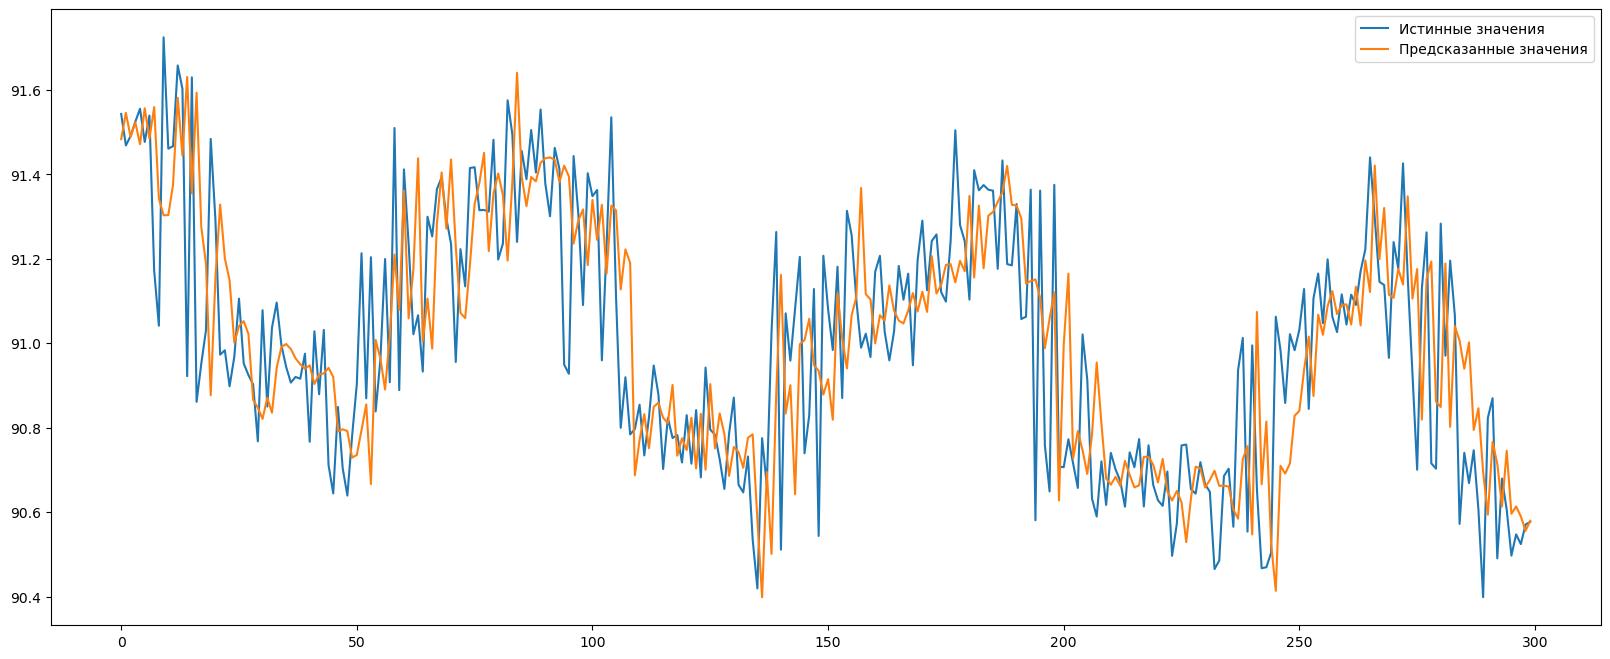

MSE Temperature 0.04685647665799454


In [126]:
p = 2
d = 1
q = 2

y_pred = []
for i in tqdm(range(len(X[:300]))):
    model = ARIMA(X[i], order=(p, d, q))
    model_fit = model.fit()
    pred = model_fit.predict(seq_lenght,seq_lenght, dynamic=False)
    y_pred.append(pred)
y_pred = np.array(y_pred)
fig = plt.figure(figsize=(20, 8))
plt.plot(y_true[:300], label = "Истинные значения")
plt.plot(y_pred[:300], label = "Предсказанные значения")
plt.legend()
plt.show()

print("MSE", column, mean_squared_error(y_true[:300], y_pred[:300]))

### Thermocouple

In [127]:
column = "Thermocouple"

1. ADF :  -3.518532369822394
2. P-Value :  0.007523705889989444
3. Num Of Lags :  19



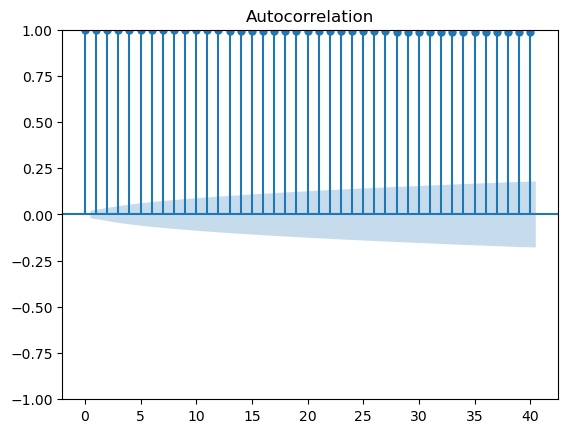

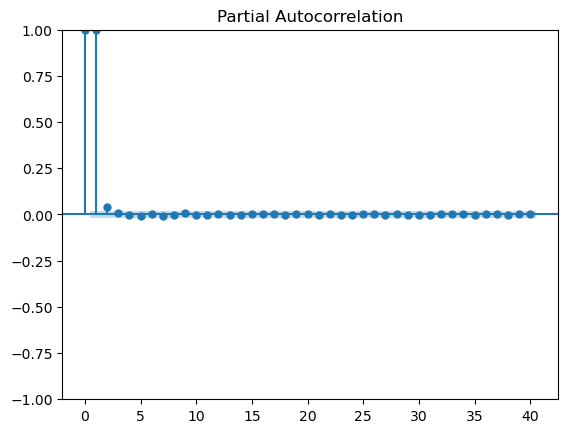

In [128]:
# Тест и АКФ (ЧАКФ) для исходного ряда
ts = np.diff(df[column], n=0)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

1. ADF :  -22.30589147579151
2. P-Value :  0.0
3. Num Of Lags :  18



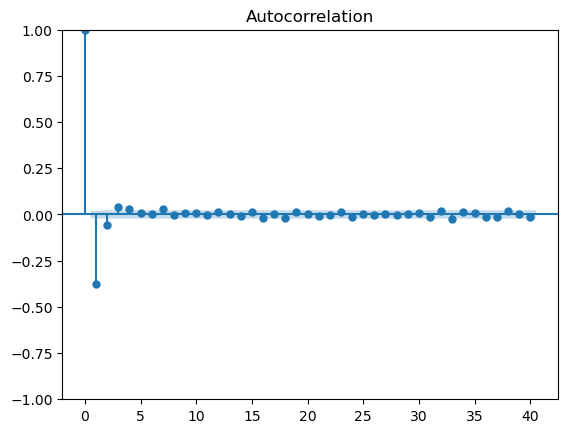

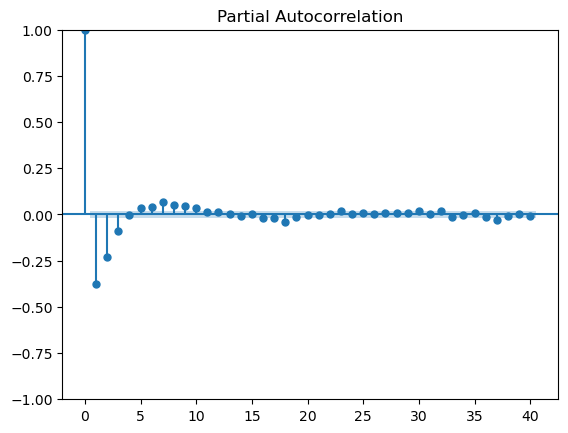

In [129]:
# Тест и АКФ (ЧАКФ) для дифференцированного временного ряда
ts = np.diff(df[column], n=1)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

In [130]:
seq_lenght = dftest[2]
data = np.array(df[column])
X, y_true = create_sequences(data, seq_lenght)

100%|██████████| 300/300 [00:31<00:00,  9.67it/s]


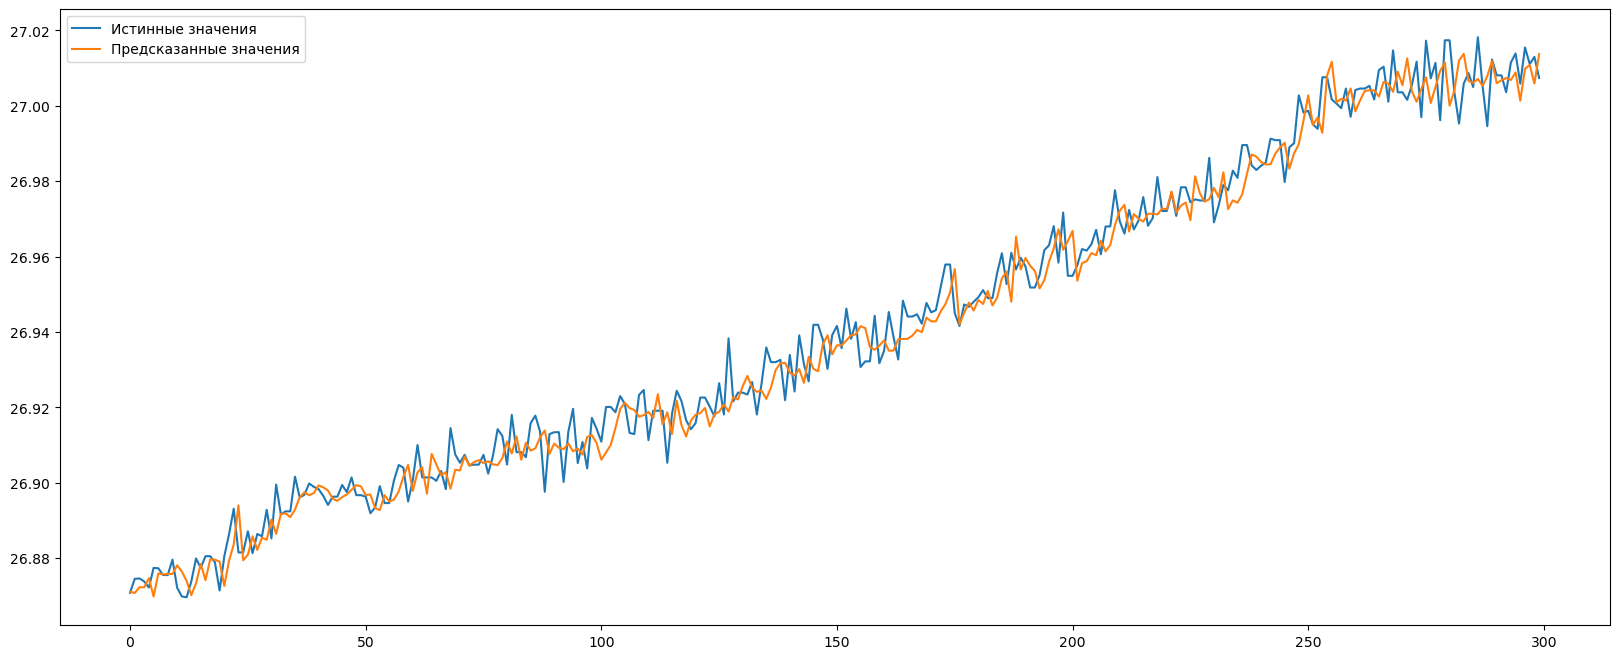

MSE Thermocouple 3.8706811763364175e-05


In [131]:
p = 2
d = 1
q = 2

y_pred = []
for i in tqdm(range(len(X[:300]))):
    model = ARIMA(X[i], order=(p, d, q))
    model_fit = model.fit()
    pred = model_fit.predict(seq_lenght,seq_lenght, dynamic=False)
    y_pred.append(pred)
y_pred = np.array(y_pred)
fig = plt.figure(figsize=(20, 8))
plt.plot(y_true[:300], label = "Истинные значения")
plt.plot(y_pred[:300], label = "Предсказанные значения")
plt.legend()
plt.show()

print("MSE", column, mean_squared_error(y_true[:300], y_pred[:300]))

### Voltage

In [132]:
column = "Voltage"

1. ADF :  -96.05731098378851
2. P-Value :  0.0
3. Num Of Lags :  0



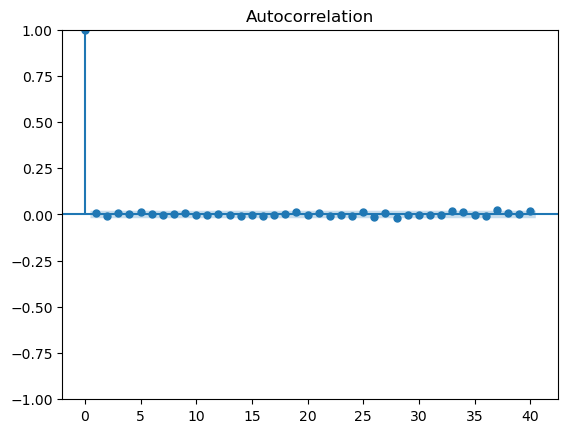

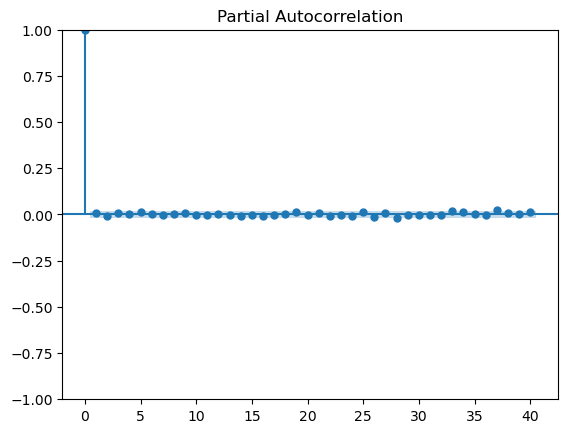

In [133]:
# Тест и АКФ (ЧАКФ) для исходного ряда
ts = np.diff(df[column], n=0)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

1. ADF :  -27.84704054808692
2. P-Value :  0.0
3. Num Of Lags :  38



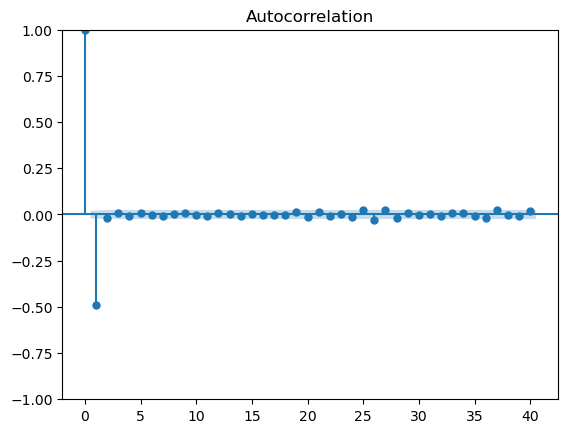

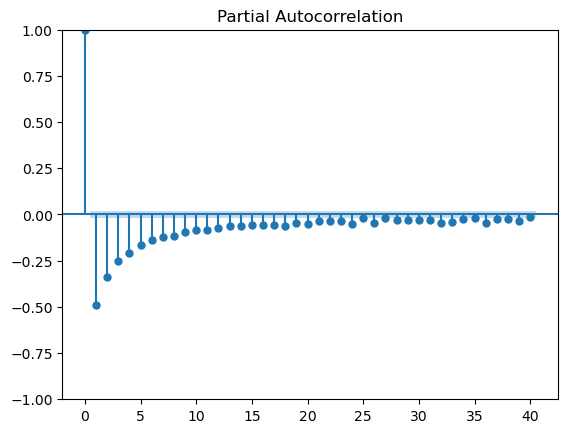

In [134]:
# Тест и АКФ (ЧАКФ) для дифференцированного временного ряда
ts = np.diff(df[column], n=1)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

In [135]:
seq_lenght = dftest[2]
data = np.array(df[column])
X, y_true = create_sequences(data, seq_lenght)

100%|██████████| 300/300 [00:21<00:00, 14.17it/s]


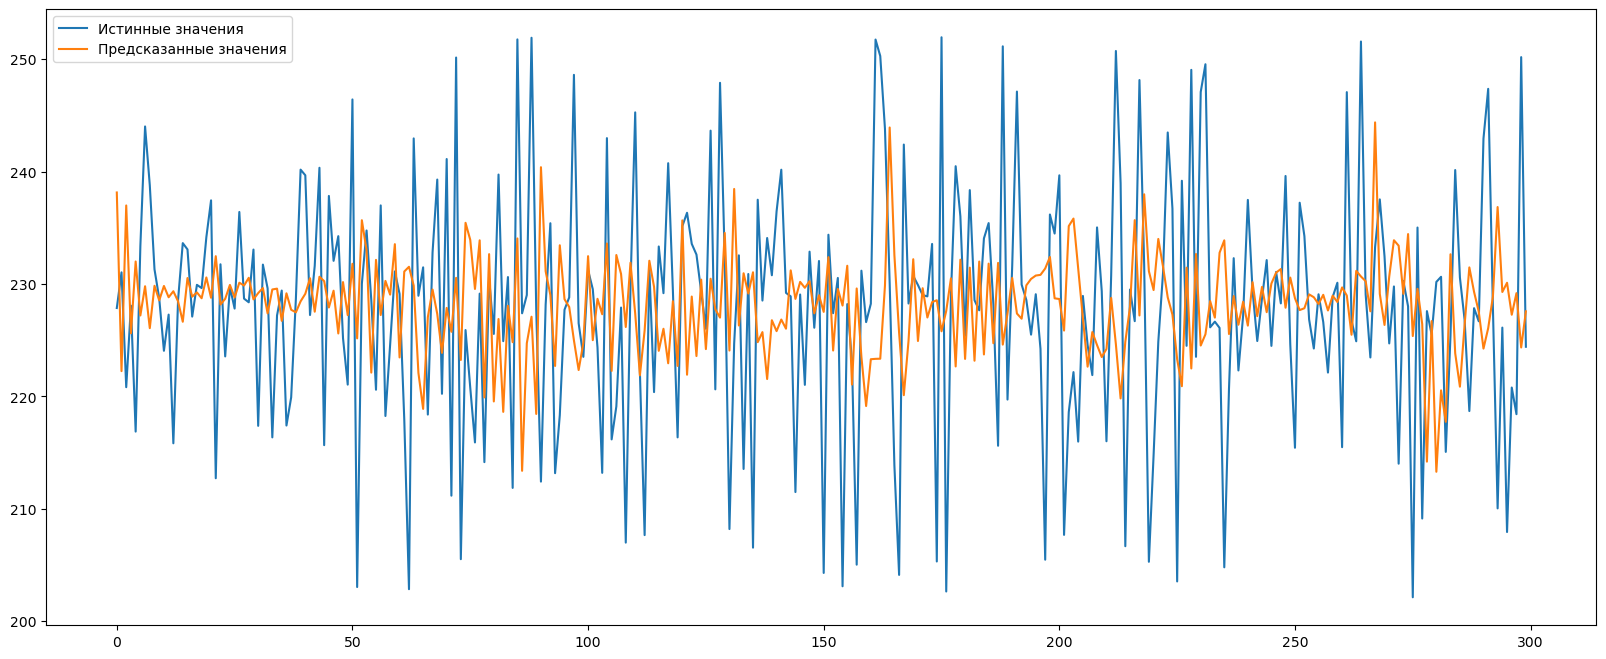

MSE Voltage 140.21671703963642


In [139]:
p = 2
d = 1
q = 2

y_pred = []
for i in tqdm(range(len(X[:300]))):
    model = ARIMA(X[i], order=(p, d, q))
    model_fit = model.fit()
    pred = model_fit.predict(seq_lenght,seq_lenght, dynamic=False)
    y_pred.append(pred)
y_pred = np.array(y_pred)
fig = plt.figure(figsize=(20, 8))
plt.plot(y_true[:300], label = "Истинные значения")
plt.plot(y_pred[:300], label = "Предсказанные значения")
plt.legend()
plt.show()

print("MSE", column, mean_squared_error(y_true[:300], y_pred[:300]))

### Volume Flow RateRMS

In [140]:
column = "Volume Flow RateRMS"

1. ADF :  -3.244626381897769
2. P-Value :  0.017542551951679582
3. Num Of Lags :  18



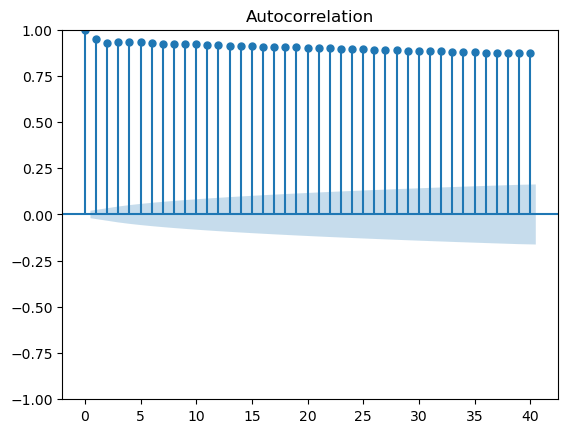

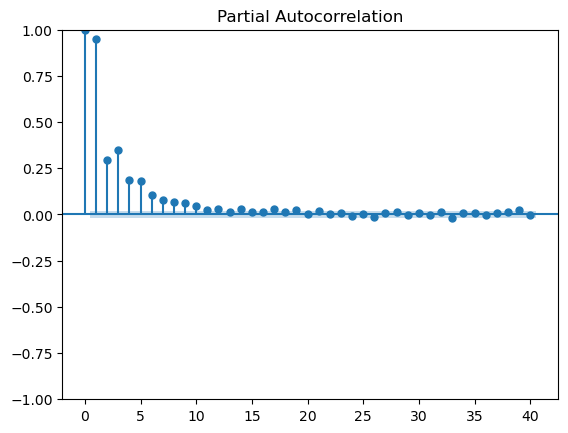

In [141]:
# Тест и АКФ (ЧАКФ) для исходного ряда
ts = np.diff(df[column], n=0)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

1. ADF :  -29.00939117410992
2. P-Value :  0.0
3. Num Of Lags :  19



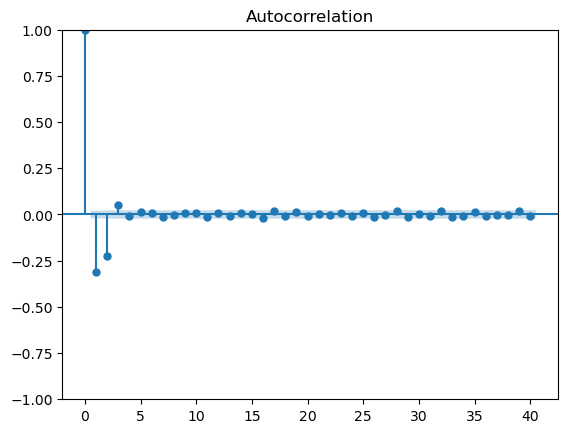

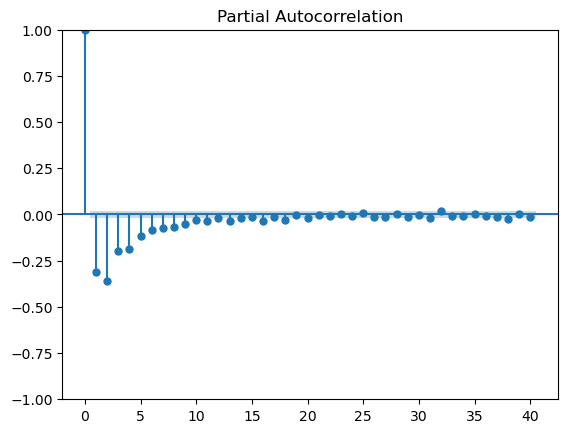

In [142]:
# Тест и АКФ (ЧАКФ) для дифференцированного временного ряда
ts = np.diff(df[column], n=1)
dftest = adfuller(ts)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print()
plot_acf(ts);
plot_pacf(ts);

In [143]:
seq_lenght = dftest[2]
data = np.array(df[column])
X, y_true = create_sequences(data, seq_lenght)

100%|██████████| 300/300 [00:23<00:00, 13.00it/s]


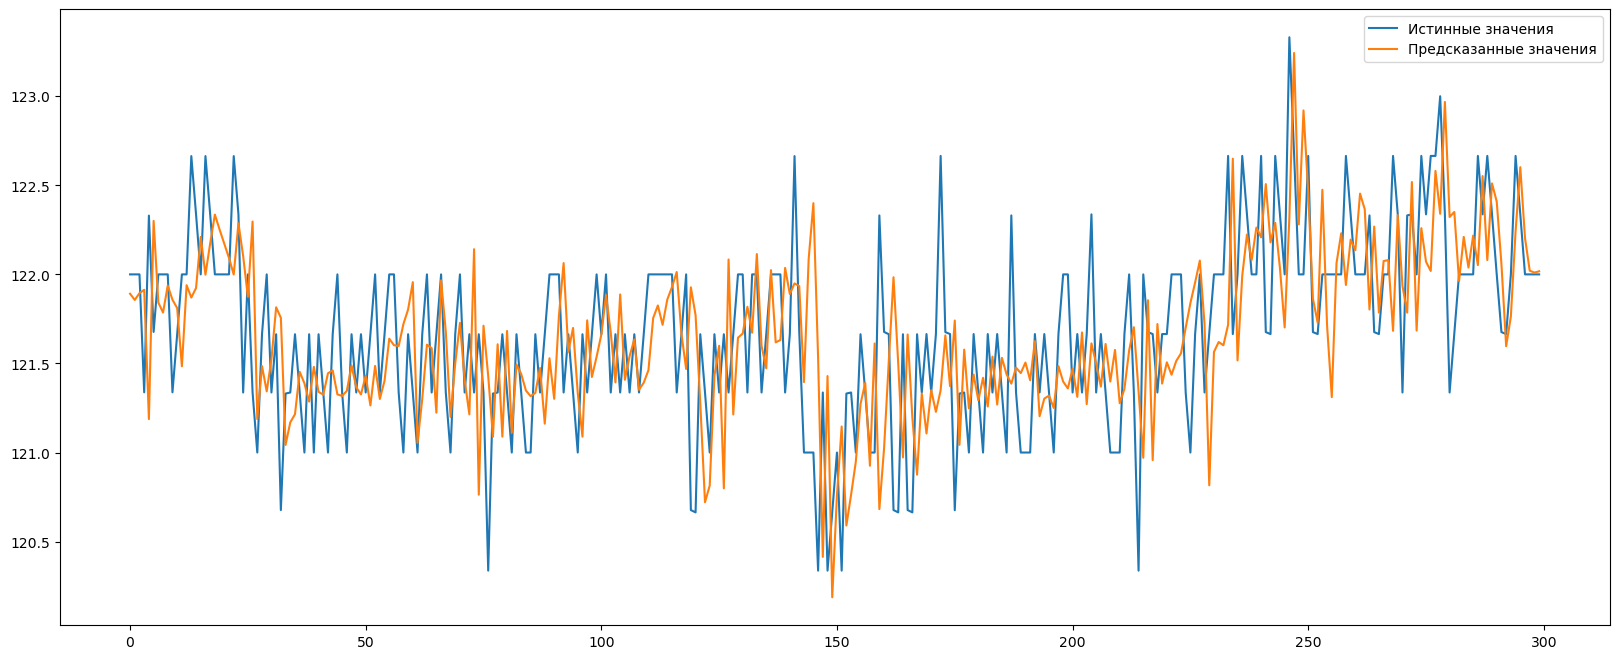

MSE Volume Flow RateRMS 0.25047801940689624


In [144]:
p = 2
d = 1
q = 2

y_pred = []
for i in tqdm(range(len(X[:300]))):
    model = ARIMA(X[i], order=(p, d, q))
    model_fit = model.fit()
    pred = model_fit.predict(seq_lenght,seq_lenght, dynamic=False)
    y_pred.append(pred)
y_pred = np.array(y_pred)
fig = plt.figure(figsize=(20, 8))
plt.plot(y_true[:300], label = "Истинные значения")
plt.plot(y_pred[:300], label = "Предсказанные значения")
plt.legend()
plt.show()

print("MSE", column, mean_squared_error(y_true[:300], y_pred[:300]))